## SMA backtester 클래스

In [2]:
import pandas as pd
import SMABacktester as SMA

In [3]:
tester = SMA.SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30")
tester

SMABacktester(symbol = EURUSD=X, SMA_S = 50, SMA_L = 200, start = 2004-01-01, end = 2020-06-30)

In [4]:
tester.test_strategy()

(1.2835, 0.367674)

In [5]:
tester.results

,price,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,0.001475,1.221840,1.226081,-1,-0.001475,1.001476,0.998526
2004-10-08,1.241003,0.008982,1.222628,1.225995,-1,-0.008982,1.010511,0.989598
2004-10-11,1.238405,-0.002095,1.223352,1.225843,-1,0.002095,1.008396,0.991673
2004-10-12,1.232104,-0.005102,1.223888,1.225643,-1,0.005102,1.003265,0.996746
2004-10-13,1.234903,0.002270,1.224466,1.225497,-1,-0.002270,1.005545,0.994486
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.101794,1.103430,-1,-0.002892,0.921130,1.271272
2020-06-25,1.125087,-0.005449,1.102486,1.103540,-1,0.005449,0.916125,1.278218
2020-06-26,1.122208,-0.002562,1.103213,1.103627,-1,0.002562,0.913781,1.281497


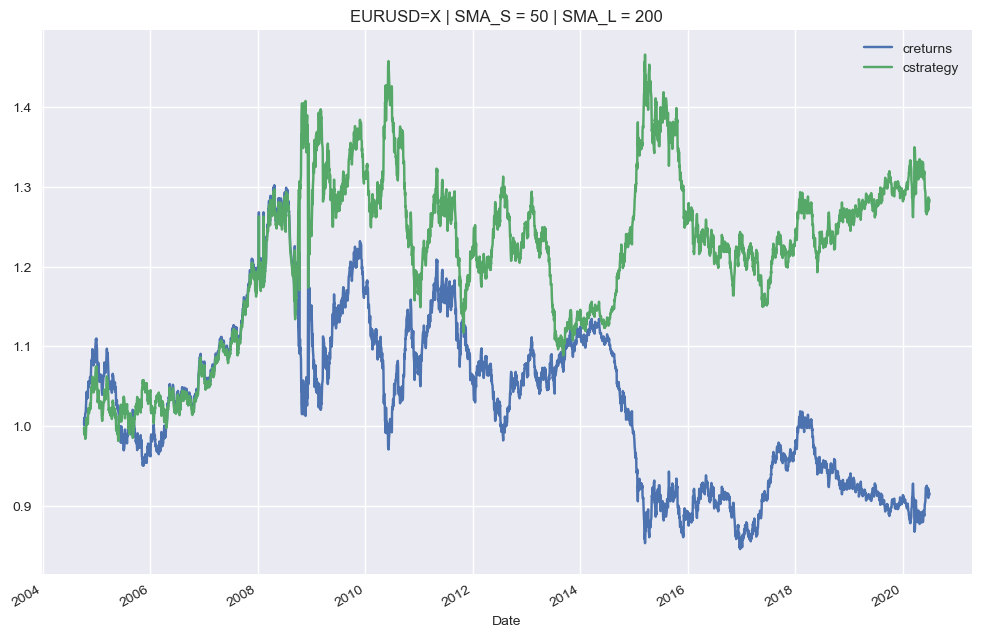

In [6]:
tester.plot_results()

In [7]:
tester.set_parameters(22, 100)

In [8]:
tester.test_strategy()

(1.165483, 0.228524)

In [9]:
tester.optimize_parameters((25, 50, 1), (100, 200, 1))

(array([ 46., 137.]), 2.526694)

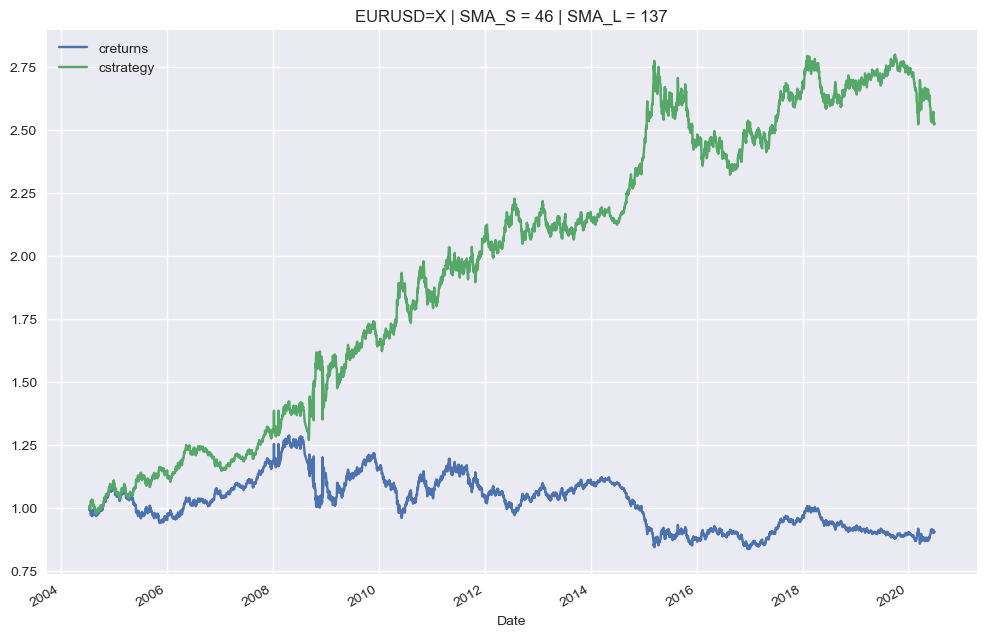

In [10]:
tester.plot_results()

In [11]:
train = SMA.SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2015-12-31")

In [12]:
train.optimize_parameters((25, 50, 1), (100, 200, 1))

(array([ 46., 137.]), 2.440535)

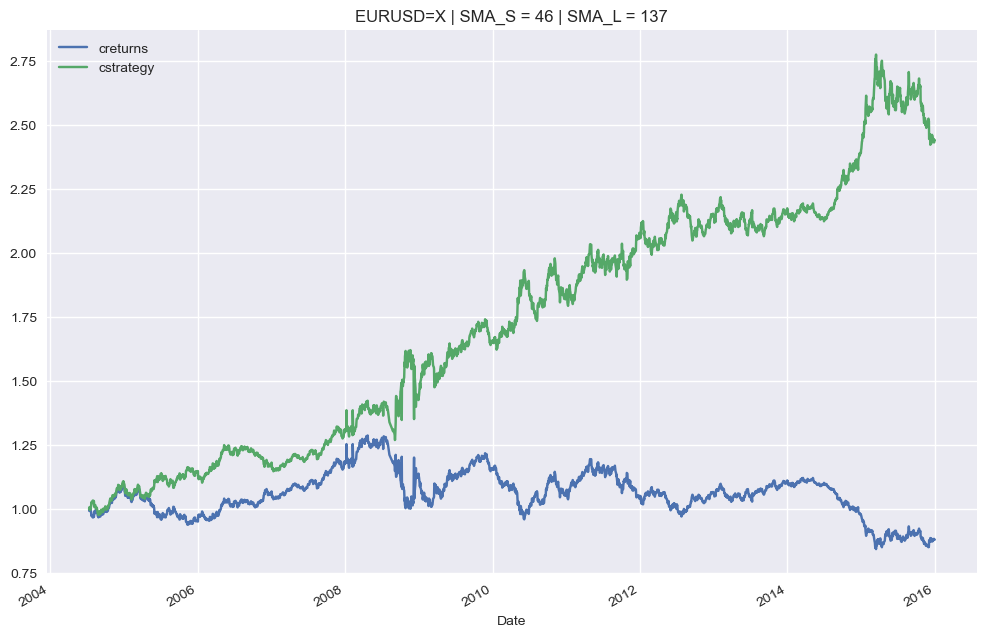

In [13]:
train.plot_results()

In [14]:
tester = SMA.SMABacktester("EURUSD=X", 46, 137, "2016-01-01", "2020-06-30")

In [15]:
tester.test_strategy()

(1.056731, 0.038331)

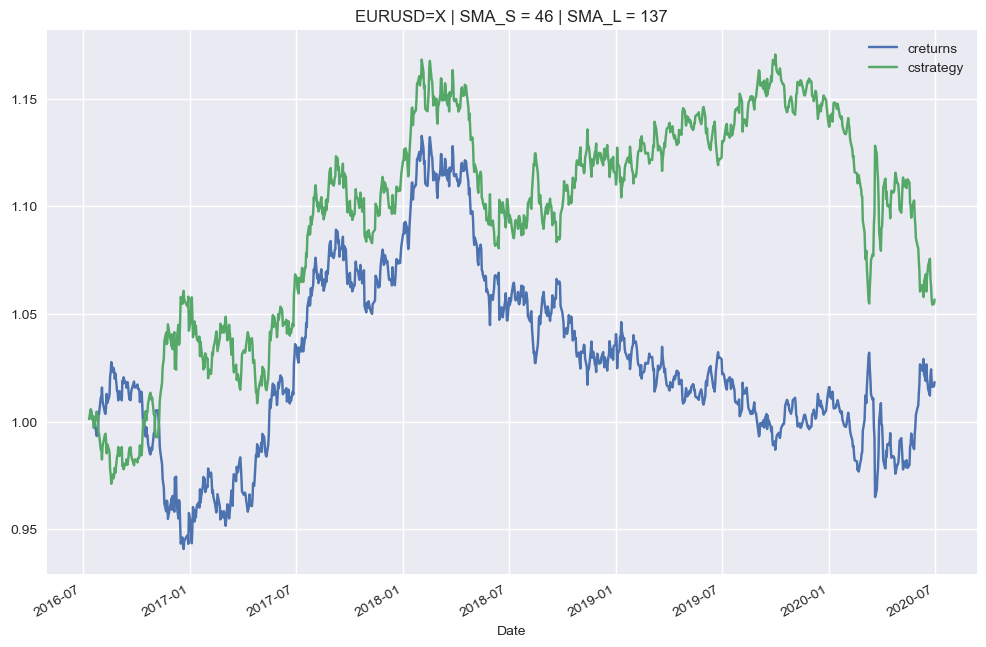

In [16]:
tester.plot_results()

In [17]:
tester = SMA.SMABacktester("AUDEUR=X", 50, 200, "2004-01-01", "2020-06-30")

In [18]:
tester.test_strategy()

(1.145599, 0.106464)

In [19]:
tester.optimize_parameters((25, 50, 1), (100, 200, 1))

(array([ 33., 197.]), 1.457339)

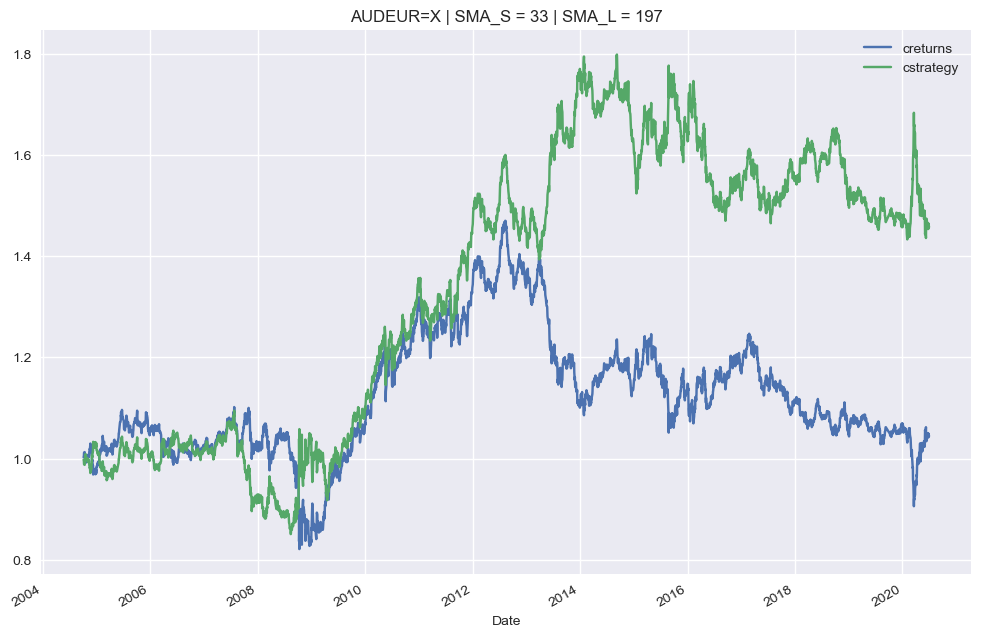

In [20]:
tester.plot_results()

## SMABacktester 클래스 만들기

In [21]:
class SMABacktester():

    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None



In [22]:
tester = SMA.SMABacktester("AUDEUR=X", 50, 200, "2004-01-01", "2020-06-30")

In [23]:
tester

SMABacktester(symbol = AUDEUR=X, SMA_S = 50, SMA_L = 200, start = 2004-01-01, end = 2020-06-30)

In [24]:
tester.symbol

'AUDEUR=X'

In [25]:
tester.SMA_L

200

In [26]:
tester.results

## get_data 메서드

In [31]:
import numpy as np

In [27]:
raw = pd.read_csv("forex_pairs.csv", parse_dates=["Date"], index_col="Date")
raw

,AUDEUR=X,EURUSD=X,USDGBP=X
Date,,,
2004-01-01,0.59780,1.258194,0.56016
2004-01-02,0.60314,1.258194,0.55751
2004-01-05,0.60467,1.268698,0.55334
2004-01-06,0.60350,1.272103,0.54906
2004-01-07,0.60728,1.264095,0.55012
...,...,...,...
2020-06-24,0.61349,1.131235,0.79841
2020-06-25,0.60938,1.125087,0.80561
2020-06-26,0.61373,1.122208,0.80480


In [28]:
raw = raw["AUDEUR=X"].to_frame().dropna()
raw

,AUDEUR=X
Date,
2004-01-01,0.59780
2004-01-02,0.60314
2004-01-05,0.60467
2004-01-06,0.60350
2004-01-07,0.60728
...,...
2020-06-24,0.61349
2020-06-25,0.60938
2020-06-26,0.61373


In [29]:
raw = raw.loc["2010-01-01":"2012-12-31"].copy()
raw

,AUDEUR=X
Date,
2010-01-01,0.62402
2010-01-04,0.63230
2010-01-05,0.63430
2010-01-06,0.63860
2010-01-07,0.64060
...,...
2012-12-25,0.78620
2012-12-26,0.78680
2012-12-27,0.78340


In [30]:
raw.rename(columns={"AUDEUR=X": "price"}, inplace=True)
raw

,price
Date,
2010-01-01,0.62402
2010-01-04,0.63230
2010-01-05,0.63430
2010-01-06,0.63860
2010-01-07,0.64060
...,...
2012-12-25,0.78620
2012-12-26,0.78680
2012-12-27,0.78340


In [32]:
raw["returns"] = np.log(raw / raw.shift(1))
raw

,price,returns
Date,,
2010-01-01,0.62402,NaN
2010-01-04,0.63230,0.013182
2010-01-05,0.63430,0.003158
2010-01-06,0.63860,0.006756
2010-01-07,0.64060,0.003127
...,...,...
2012-12-25,0.78620,-0.002921
2012-12-26,0.78680,0.000763
2012-12-27,0.78340,-0.004331


In [33]:
raw["SMA_S"] = raw["price"].rolling(50).mean()
raw["SMA_L"] = raw["price"].rolling(200).mean()

In [34]:
raw

,price,returns,SMA_S,SMA_L
Date,,,,
2010-01-01,0.62402,NaN,NaN,NaN
2010-01-04,0.63230,0.013182,NaN,NaN
2010-01-05,0.63430,0.003158,NaN,NaN
2010-01-06,0.63860,0.006756,NaN,NaN
2010-01-07,0.64060,0.003127,NaN,NaN
...,...,...,...,...
2012-12-25,0.78620,-0.002921,0.803610,0.805435
2012-12-26,0.78680,0.000763,0.803618,0.805410
2012-12-27,0.78340,-0.004331,0.803462,0.805372


In [44]:
class SMABacktester():

    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None

        self.get_data()

    def get_data(self):
        raw = pd.read_csv("forex_pairs.csv", parse_dates=["Date"], index_col="Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean()
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        # return raw

In [45]:
tester = SMABacktester("AUDEUR=X", 50, 200, "2010-01-01", "2019-12-31")

In [46]:
tester.data

,price,returns,SMA_S,SMA_L
Date,,,,
2010-01-01,0.62402,NaN,NaN,NaN
2010-01-04,0.63230,0.013182,NaN,NaN
2010-01-05,0.63430,0.003158,NaN,NaN
2010-01-06,0.63860,0.006756,NaN,NaN
2010-01-07,0.64060,0.003127,NaN,NaN
...,...,...,...,...
2019-12-25,0.62410,-0.000240,0.617223,0.619946
2019-12-26,0.62380,-0.000481,0.617499,0.619907
2019-12-27,0.62550,0.002722,0.617745,0.619901


In [47]:
tester.get_data()

### 새로운 SMA 파라미터 설정

In [48]:
tester.SMA_S

50

In [49]:
tester.SMA_L

200

In [53]:
tester.data.isna().sum()

price        0
returns      1
SMA_S       49
SMA_L      199
dtype: int64

In [52]:
tester.SMA_L = 250
tester.SMA_L

250

In [54]:
class SMABacktester():

    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None

        self.get_data()

    def get_data(self):
        raw = pd.read_csv("forex_pairs.csv", parse_dates=["Date"], index_col="Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean()
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        # return raw

    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()

In [55]:
tester = SMABacktester("AUDEUR=X", 50, 200, "2010-01-01", "2019-12-31")

In [58]:
tester.data.isna().sum()

price        0
returns      1
SMA_S       24
SMA_L      149
dtype: int64

In [57]:
tester.set_parameters(SMA_S=25, SMA_L=150)

### 전략 테스트

In [59]:
class SMABacktester():

    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None

        self.get_data()

    def get_data(self):
        raw = pd.read_csv("forex_pairs.csv", parse_dates=["Date"], index_col="Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean()
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        # return raw

    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()

    def test_strategy(self):
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data

        perf = data["cstrategy"].iloc[-1]
        outperf = perf - data["creturns"].iloc[-1]
        return round(perf, 6), round(outperf, 6)


In [60]:
tester = SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30")

In [61]:
tester.test_strategy()

(1.2835, 0.367674)

In [62]:
tester.data

,price,returns,SMA_S,SMA_L
Date,,,,
2004-01-01,1.258194,NaN,NaN,NaN
2004-01-02,1.258194,0.000000,NaN,NaN
2004-01-05,1.268698,0.008313,NaN,NaN
2004-01-06,1.272103,0.002681,NaN,NaN
2004-01-07,1.264095,-0.006315,NaN,NaN
...,...,...,...,...
2020-06-24,1.131235,0.002892,1.101794,1.103430
2020-06-25,1.125087,-0.005449,1.102486,1.103540
2020-06-26,1.122208,-0.002562,1.103213,1.103627


In [63]:
tester.results

,price,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,0.001475,1.221840,1.226081,-1,-0.001475,1.001476,0.998526
2004-10-08,1.241003,0.008982,1.222628,1.225995,-1,-0.008982,1.010511,0.989598
2004-10-11,1.238405,-0.002095,1.223352,1.225843,-1,0.002095,1.008396,0.991673
2004-10-12,1.232104,-0.005102,1.223888,1.225643,-1,0.005102,1.003265,0.996746
2004-10-13,1.234903,0.002270,1.224466,1.225497,-1,-0.002270,1.005545,0.994486
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.101794,1.103430,-1,-0.002892,0.921130,1.271272
2020-06-25,1.125087,-0.005449,1.102486,1.103540,-1,0.005449,0.916125,1.278218
2020-06-26,1.122208,-0.002562,1.103213,1.103627,-1,0.002562,0.913781,1.281497


In [64]:
class SMABacktester():

    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None

        self.get_data()

    def get_data(self):
        raw = pd.read_csv("forex_pairs.csv", parse_dates=["Date"], index_col="Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean()
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        # return raw

    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()

    def test_strategy(self):
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data

        perf = data["cstrategy"].iloc[-1]
        outperf = perf - data["creturns"].iloc[-1]
        return round(perf, 6), round(outperf, 6)

    def plot_results(self):
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))

In [65]:
tester = SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30")

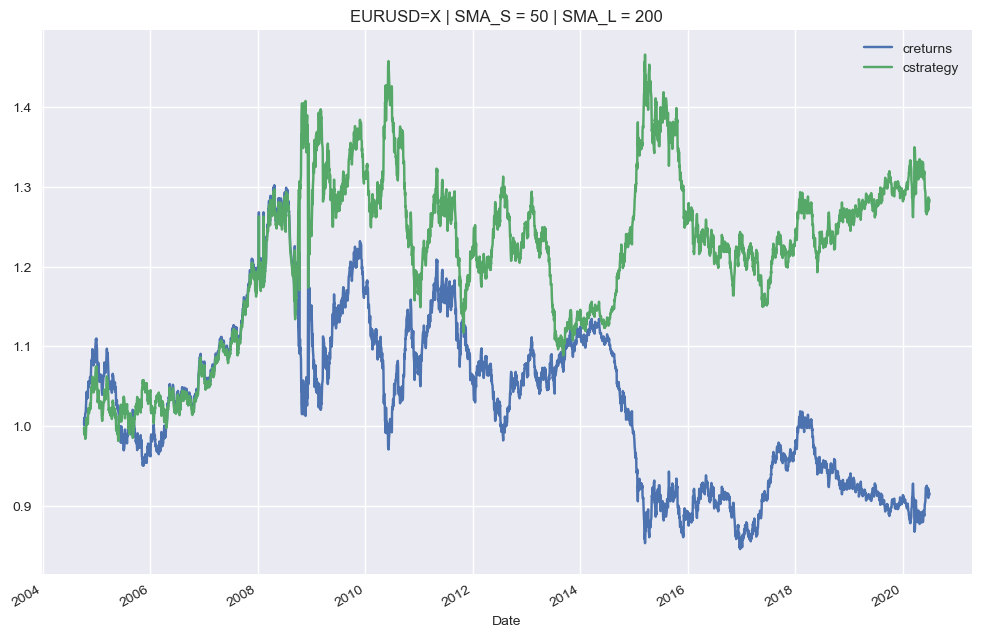

In [68]:
tester.plot_results()

In [67]:
tester.test_strategy()

(1.2835, 0.367674)

### 최적화

In [69]:
tester.set_parameters(25, 150)

In [70]:
tester.test_strategy()

(1.586563, 0.652719)

In [80]:
class SMABacktester():

    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None

        self.get_data()

    def get_data(self):
        raw = pd.read_csv("forex_pairs.csv", parse_dates=["Date"], index_col="Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean()
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        # return raw

    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()

    def test_strategy(self):
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data

        perf = data["cstrategy"].iloc[-1]
        outperf = perf - data["creturns"].iloc[-1]
        return round(perf, 6), round(outperf, 6)

    def plot_results(self):
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))

    def update_and_run(self, SMA):
        self.set_parameters(int(SMA[0]), int(SMA[1]))
        return -self.test_strategy()[0]


In [81]:
tester = SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30")

In [82]:
tester.test_strategy()

(1.2835, 0.367674)

In [83]:
tester.update_and_run((25, 150))

-1.586563

### 매개변수 최적화

In [88]:
from scipy.optimize import brute

In [90]:
class SMABacktester():

    def __init__(self, symbol, SMA_S, SMA_L, start, end, tc):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None

        self.get_data()

    def get_data(self):
        raw = pd.read_csv("forex_pairs.csv", parse_dates=["Date"], index_col="Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean()
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        # return raw

    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()

    def test_strategy(self):
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)

        data["trades"] = data.position.diff().fillna(0).abs()

        data.strategy = data.strategy - data.trades * self.tc

        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data

        perf = data["cstrategy"].iloc[-1]
        outperf = perf - data["creturns"].iloc[-1]
        return round(perf, 6), round(outperf, 6)

    def plot_results(self):
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))

    def update_and_run(self, SMA):
        self.set_parameters(int(SMA[0]), int(SMA[1]))
        return -self.test_strategy()[0]

    def optimize_parameters(self, SMA_S_range, SMA_L_range):
        opt = brute(self.update_and_run, (SMA_S_range, SMA_L_range), finish=None)
        return opt, -self.update_and_run(opt)

In [91]:
ptc = 0.00007

In [92]:
tester = SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30", ptc)

In [93]:
tester.test_strategy()

(1.279732, 0.363906)

In [94]:
tester.optimize_parameters((10, 50, 1), (100, 252, 1))

(array([ 46., 137.]), 2.517161)

In [95]:
tester = SMABacktester("EURUSD=X", 1, 200, "2004-01-01", "2020-06-30", ptc)

In [96]:
tester.test_strategy()

(1.418575, 0.502749)

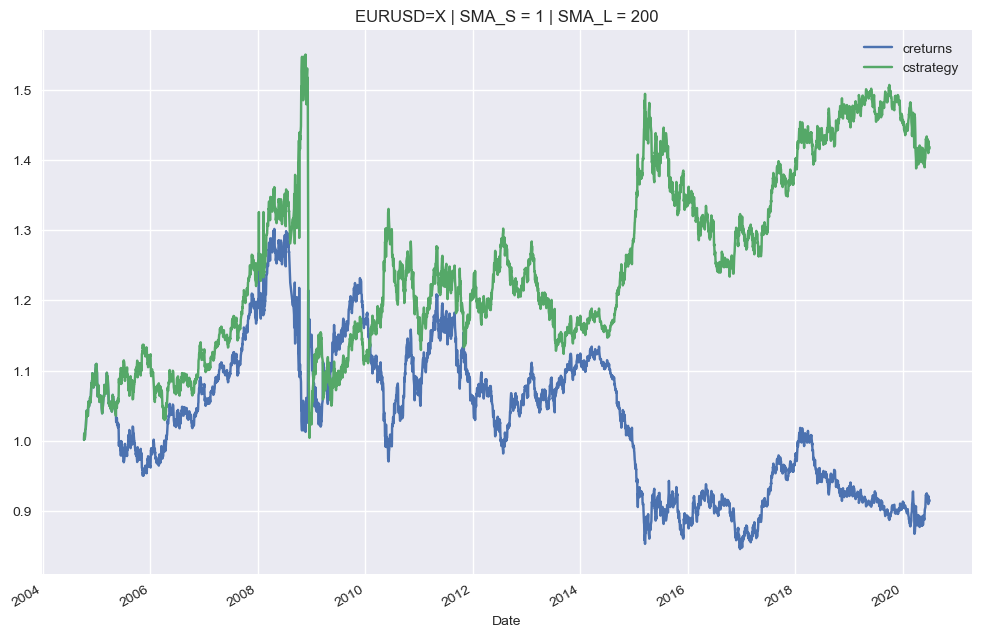

In [97]:
tester.plot_results()

In [98]:
tester.data

,price,returns,SMA_S,SMA_L
Date,,,,
2004-01-01,1.258194,NaN,1.258194,NaN
2004-01-02,1.258194,0.000000,1.258194,NaN
2004-01-05,1.268698,0.008313,1.268698,NaN
2004-01-06,1.272103,0.002681,1.272103,NaN
2004-01-07,1.264095,-0.006315,1.264095,NaN
...,...,...,...,...
2020-06-24,1.131235,0.002892,1.131235,1.103430
2020-06-25,1.125087,-0.005449,1.125087,1.103540
2020-06-26,1.122208,-0.002562,1.122208,1.103627


In [99]:
tester.optimize_parameters((1, 5, 1), (50, 200, 1))

(array([  4., 182.]), 1.896172)